In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib.widgets import RadioButtons
from matplotlib.widgets import CheckButtons
from matplotlib.widgets import TextBox
from matplotlib.widgets import SpanSelector
from matplotlib.widgets import Button
from matplotlib.widgets import Slider

- The matplotlib.widgets module defines a Button class - to connect to it call the on_clicked() function, which executes the function we supply. 
- Once a click has been detected, the function executes. 

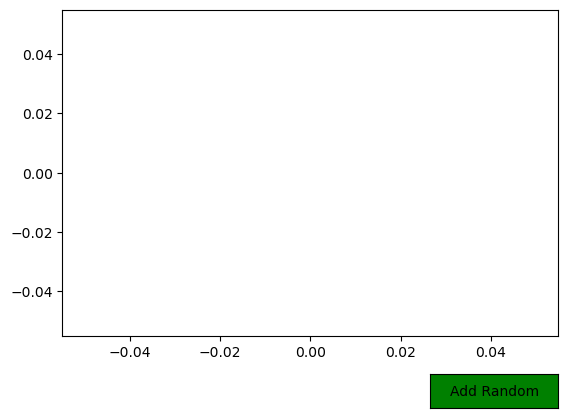

In [2]:
# Adding Buttons

# Create the figure and axes objects
fig, ax = plt.subplots()
# Adjust the subplot with margin
fig.subplots_adjust(bottom = 0.2)
# Scatter Plot with empty arrays
plot = ax.scatter([], [])

# Event Handler Class
class EventHandler:
    # Add Random Function
    def add_random(self, event):
        # x as random integer from range of 100
        x = np.random.randint(0, 100)
        # y as random integer from range of 100
        y = np.random.randint(0, 100)
        # Scatter plot of x and y
        ax.scatter(x, y)
        # Draw the plot
        plt.draw()
# Create the button location        
button_ax = plt.axes([0.7, 0.05, 0.2, 0.07])

# Create the botton object
button = Button(button_ax, 'Add Random', color = 'green', hovercolor = 'red')
# Button clicked
button.on_clicked(EventHandler().add_random)

# Show the figure
plt.show()

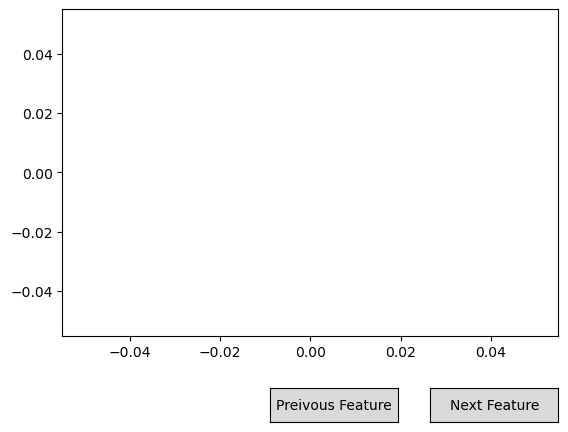

In [3]:
# Create the figure and axes objects
fig, ax = plt.subplots()
# Adjust the subplot with margin
fig.subplots_adjust(bottom = 0.2)

# Reference the dataset file
file = 'winequality-red.csv'

# Create the dataframe
df = pd.read_csv(file)
# Scatter plot with empty arrays
plot = ax.scatter([], [])

# Event Handler Class
class EventHandler:
    i = 0
    # Find and plot next feature, re-draw the Axes    
    def next_feature(self, event):
        # If the counter is at the end of the columns
        # Revert it back to 0 to cycle through again
        if self.i >= len(df.columns):
            self.i = 0
        ## Clear axes from last plot
        ax.cla()
        # Plot a feature against a feature located on the 'i' column
        ax.scatter(df['alcohol'], df.iloc[:, self.i])
        # Set labels
        ax.set_xlabel('Alcohol')
        ax.set_ylabel(df.columns[self.i])
        # Increment i
        self.i += 1
        # Update Figure
        plt.draw()
        
    def previous_feature(self, event):
        # If the counter is at the start of the columns
        # Rever it back to the last column to cycle through
        if self.i <= 0:
            self.i = len(df.columns)-1
        # Clear Axes from last plot
        ax.cla()
        ax.scatter(df['alcohol'], df.iloc[:, self.i])
        # Set labels
        ax.set_xlabel('Alcohol')
        ax.set_ylabel(df.columns[self.i])
        # Increment i
        self.i += 1
        # Update Figure
        plt.draw()
        
# Add Buttons
# Button location
button1_ax = plt.axes([0.7, 0.02, 0.2, 0.07])
# Next button object
next_button = Button(button1_ax, 'Next Feature')
# Nect button clicked
next_button.on_clicked(EventHandler().next_feature)

# Second button location
button2_ax = plt.axes([0.45, 0.02, 0.2, 0.07])
# Previous button object
previous_button = Button(button2_ax, 'Preivous Feature')
# Previous button clicked
previous_button.on_clicked(EventHandler().previous_feature)

# Show the figure
plt.show()

### Adding Radion Buttons and Check Boxes

- Radio Buttons are used to allow a user to slect one value out of several values. Only one radio button can be selected at a time, and they typically represent a choice.
- Check Boxes can be used if you'd like to let the user select multiple options at once. 

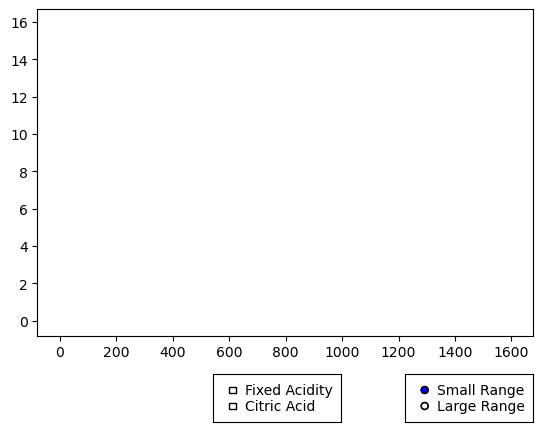

In [4]:
# Create the figure and axes objects
fig, ax = plt.subplots()
# Adjust the subplots with margin 
fig.subplots_adjust(bottom = 0.2)

# Reference the dataset file
file = 'winequality-red.csv'

# Create the dataframe
df = pd.read_csv(file)

# Plot two line plots for two features, and turn them invisible

# Line 1 plot of fixed acidity
line1, = ax.plot(df['fixed acidity'], visible = False)
# Line 2 plot of cictric acid
line2, = ax.plot(df['citric acid'], visible = False)

# Event Handler Class
class EventHandler:
        # set_range handler function
    def set_range(label):
        # set x and y limits dependent on range
        if (label == 'Small Range'):
            ax.set_xlim(0, 1600)
            ax.set_ylim(0, 25)
        else:
            ax.set_xlim(0, 1600)
            ax.set_ylim(0, 50)
        # Draw the plot
        plt.draw()
        
    # Turn off, if on, and on if off
    def apply_features(label):
        # Determine visibility based on label
        if (label == 'Fixed Acidity'):
            line1.set_visible(not line1.get_visible())
        elif (label == 'Citric Acid'):
            line2.set_visible(not line2.get_visible())
        # Draw the plot
        plt.draw()
        
# Add radio buttons and check boxes

# Radio button location
range_ax = plt.axes([0.7, 0.02, 0.2, 0.1])
# Radio button object
range_radio_buttons = RadioButtons(range_ax, ('Small Range', 'Large Range'))
# Radion button clicked
range_radio_buttons.on_clicked(EventHandler.set_range)

# Check boxes location
checkboxes_ax = plt.axes([0.4, 0.02, 0.2, 0.1])
# Check boxes object
checkboxes = CheckButtons(checkboxes_ax, ('Fixed Acidity', 'Citric Acid'))
# Check boxes clicked
checkboxes.on_clicked(EventHandler.apply_features)

# Show the figure
plt.show()


### Adding Textboxes

- Textboxes are used to collect data from the user - and we can alter the plots based on this data. 

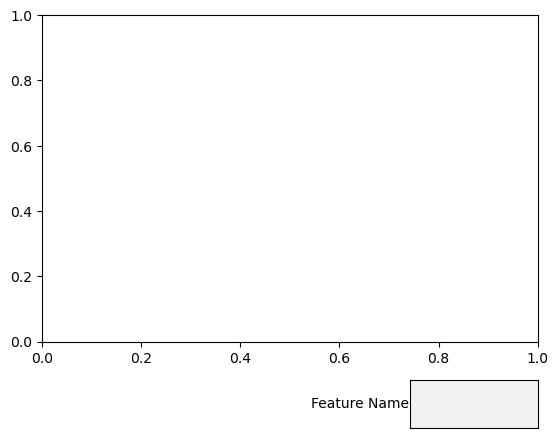

In [5]:
# Create the figure and axes object
fig, ax = plt.subplots()
# Adjuest the subplot margin
fig.subplots_adjust(bottom = 0.2)

# Reference the dataset file
file = 'winequality-red.csv'

# Create the dataframe
df = pd.read_csv(file)

# Event Handler Class
class EventHandler:
    # Submit function
    def submit(feature_name):
        # Plot the data of the feature name
        if feature_name != '' or feature_name != None:
            if feature_name in df:
                ax.cla()
                ax.plot(df[feature_name])
            else:
                if len(textbox_ax.texts) > 2:
                    del textbox_ax.texts[-1]
                textbox_ax.text(-2, 0.4, feature_name + 'was not found.')
        plt.draw()

# Text box location              
textbox_ax = plt.axes([0.7, 0.02, 0.2, 0.1])
# Textbox object
textbox = TextBox(textbox_ax, 'Feature Name')
# Text box submit
textbox.on_submit(EventHandler.submit)

# Show the figure
plt.show()

### Adding Span Selectors

- Span Selectors can be used to allow the user to select a span of data and focus on it, setting hte axis limits based on that selection. 

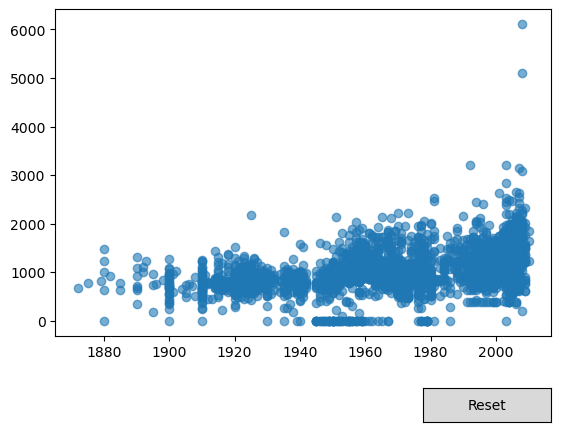

In [6]:
# Create the figure and axes objects
fig, ax = plt.subplots()
# Adjust the subplot with margin
fig.subplots_adjust(bottom = 0.2)

# Reference the dataset file
file = 'AmesHousing.csv'

# Create the dataframe
df = pd.read_csv(file)

# Scatter plot for the relationship between x - the year built and 
# y - the total basement square footage
ax.scatter(x = df['Year Built'], y = df['Total Bsmt SF'], alpha = 0.6)

# Event Handler Class
class EventHandler:
    # Span selector
    def select_horizontal(x, y):
        ax.set_xlim(x, y)
        plt.draw()
        
    def reset(self):
        ax.set_xlim(df['Year Built'].min(), df['Year Built'].max())
        plt.draw()
        
# Span selector object   
span_horizontal = SpanSelector(ax, EventHandler.select_horizontal, 'horizontal', useblit = True, props = dict(alpha = 0.5, facecolor = 'blue'))
    
# Botton location
button_ax = plt.axes([0.7, 0.02, 0.2, 0.07])
# Botton object
button = Button(button_ax, 'Reset')
# Button clicked
button.on_clicked(EventHandler.reset)

# Show the figure
plt.show()

### Adding Sliders

- Sliders allow users to select between many values intuitively by sliding a marker and selecting a value.

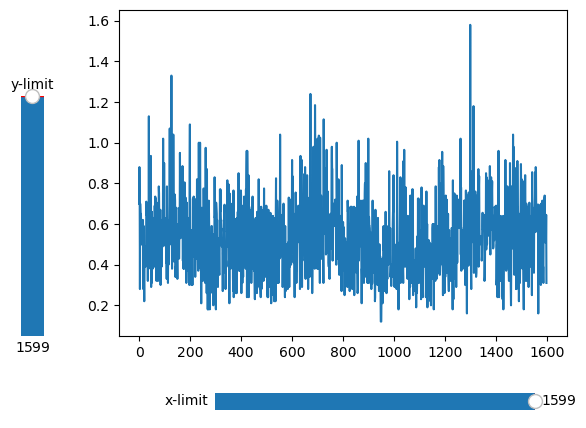

In [7]:
# Create the figure and axes objects
fig, ax = plt.subplots()
# Adjust the subplots with margin
fig.subplots_adjust(bottom = 0.2, left = 0.2)

# Reference the dataset file
file = 'winequality-red.csv'

# Create the dataframe
df = pd.read_csv(file)
# Plot volative acidity
plot, = ax.plot(df['volatile acidity'])

# Event Handler Class
class EventHandler:
    # Update values function
    def update(val):
        ax.set_ylim(0, yslider.val)
        ax.set_xlim(0, xslider.val)
        plt.draw()
# x axis Slider location
xslider_ax = plt.axes([0.35, 0.03, 0.5, 0.07])
# x axis Slider object
xslider = Slider(
    ax = xslider_ax, 
    label = 'x-limit',
    valmin = 0,
    valmax = len(df['volatile acidity']),
    valinit = len(df['volatile acidity']),
    orientation = 'horizontal'
)

# y axis Slider location
yslider_ax = plt.axes([0.03, 0.2, 0.07, 0.5])
# y axis Slider object
yslider = Slider(
    ax = yslider_ax,
    label = 'y-limit',
    valmin = 0,
    valmax = len(df['volatile acidity']),
    valinit = len(df['volatile acidity']),
    orientation = 'vertical'
)

# x axis slider on change
xslider.on_changed(EventHandler.update)
# y axis slider on change
yslider.on_changed(EventHandler.update)

# Show the figure
plt.show()